In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

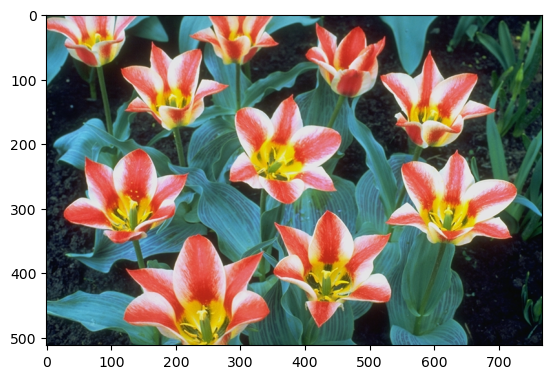

In [8]:
img_rgb = cv2.imread("public/images/tulips.png", cv2.IMREAD_COLOR_RGB)
plt.imshow(img_rgb)
plt.show()

---
## 1. Image Negative

In [9]:
def plot_histogram(img):
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        histr = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(histr, color = col)
        plt.xlim([0, 256])

In [10]:
height, width, channels = img_rgb.shape
print(f"height: {height}, width: {width}, channels: {channels}")
img_rgb_new = np.zeros_like(img_rgb)

img_rgb_new = 255 - img_rgb

# OR
# for i in range(height):
#     for j in range(width):
#         img_rgb_new[i, j] = 255 - img_rgb[i, j]

height: 512, width: 768, channels: 3


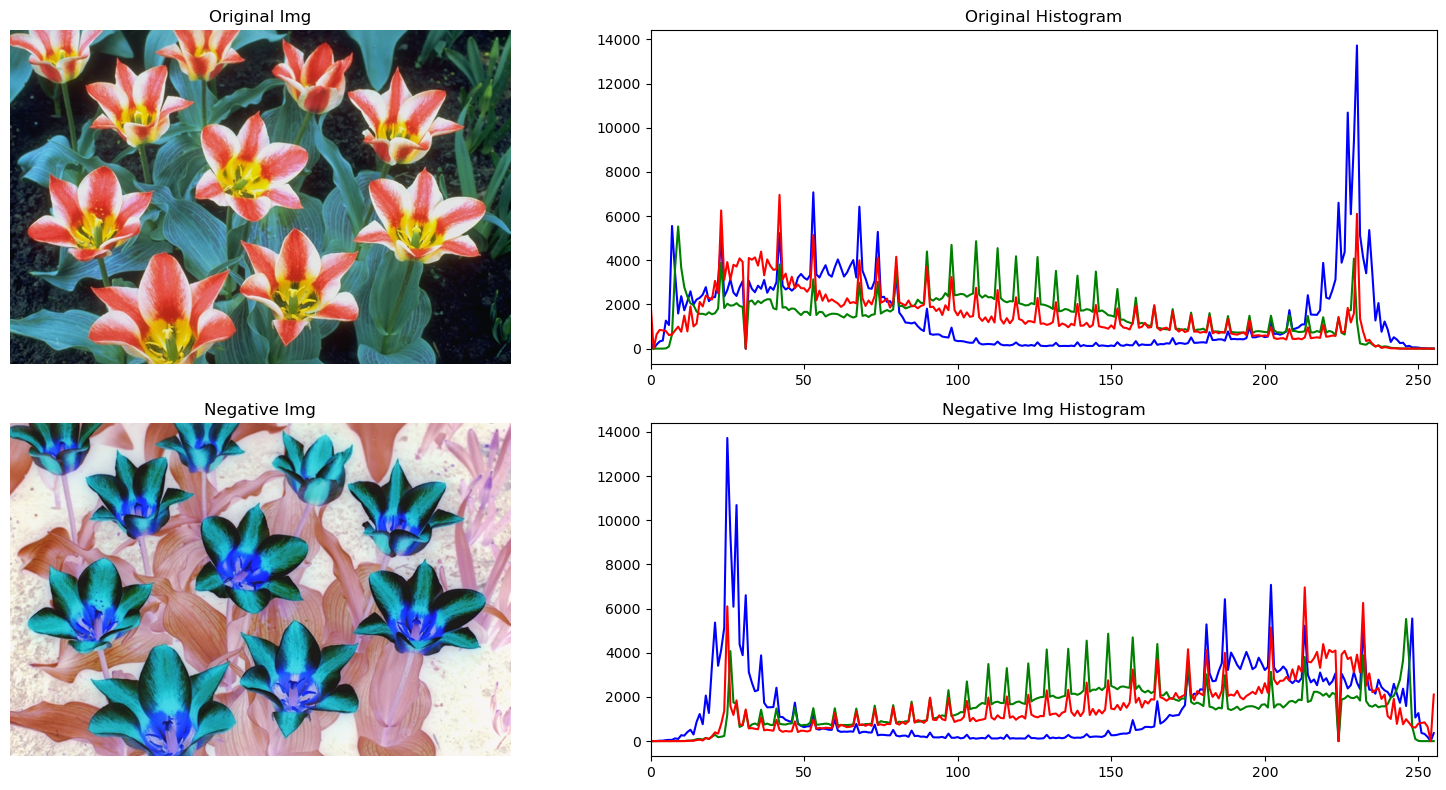

In [11]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Img")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Original Histogram")
plot_histogram(img_rgb)


plt.subplot(2, 2, 3)
plt.imshow(img_rgb_new)
plt.title("Negative Img")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Negative Img Histogram")
plot_histogram(img_rgb_new)

plt.tight_layout()
plt.show()

---
## 2. Contrast Stretching

In [18]:
# Method 1: Manual Implementation
img_gray = cv2.imread("public/images/tulips.png", 0)

min_val = np.min(img_gray)
max_val = np.max(img_gray)

img_gray_new = ((img_gray.astype(float) - min_val) / (max_val - min_val)) * 255
img_gray_new = np.uint8(np.clip(img_gray_new, 0, 255))

print(f"original:\n{img_gray},\n\nstretched:\n{img_gray_new}")

original:
[[87 78 72 ... 34 39 43]
 [74 74 74 ... 21 34 46]
 [74 74 74 ... 21 34 56]
 ...
 [70 50 43 ...  0  0  0]
 [68 39  0 ...  0  0  0]
 [53 28 21 ...  0  0  0]],

stretched:
[[90 81 75 ... 35 40 44]
 [77 77 77 ... 21 35 48]
 [77 77 77 ... 21 35 58]
 ...
 [73 52 44 ...  0  0  0]
 [71 40  0 ...  0  0  0]
 [55 29 21 ...  0  0  0]]


In [ ]:
# Method 2: OpenCV built-in method
stretched_cv2 = cv2.normalize(img_gray, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

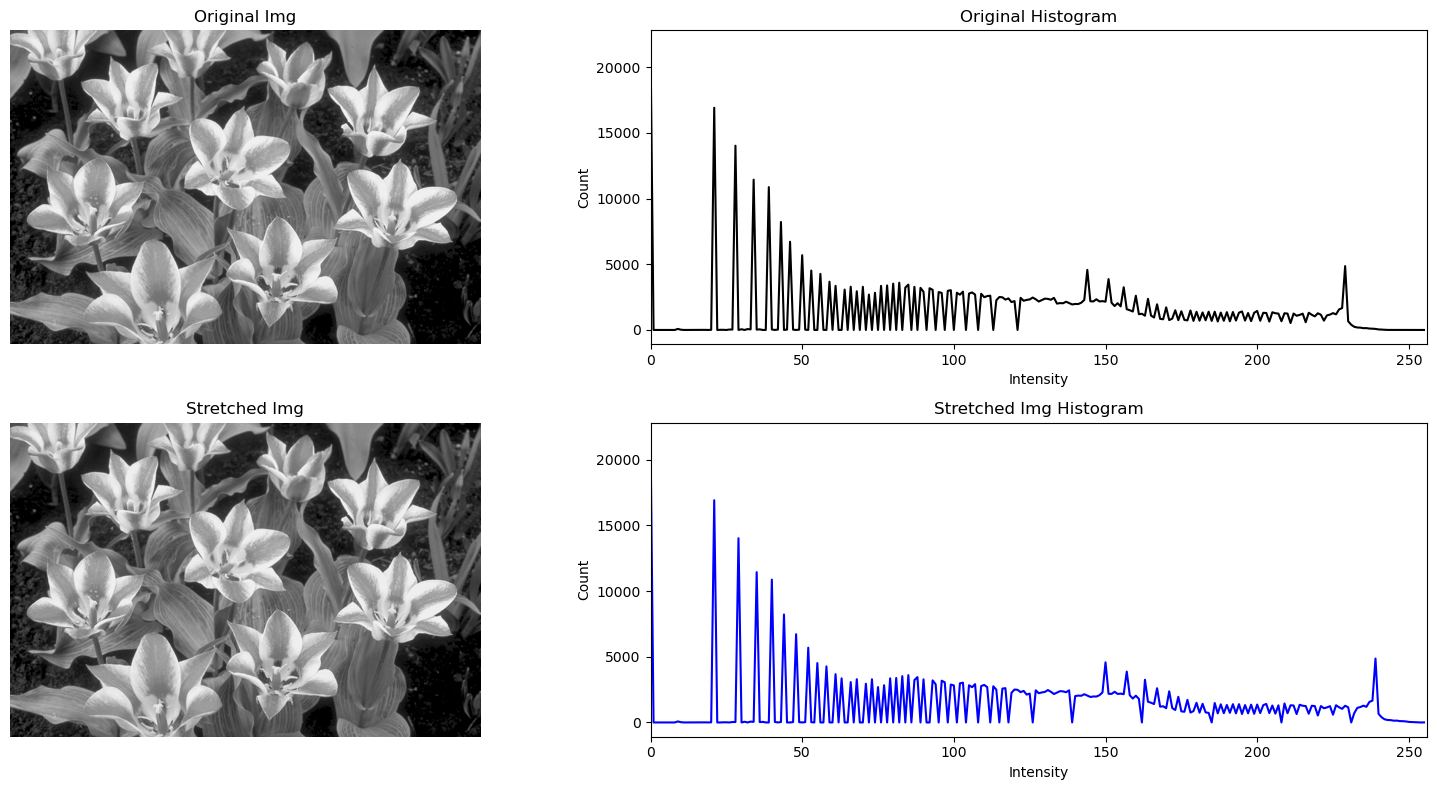

In [20]:
def plot_histogram(img, color='black', label=None):
    histr = cv2.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(histr, color=color, label=label)
    plt.xlim([0, 256])
    plt.xlabel("Intensity")
    plt.ylabel("Count")

plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Img")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Original Histogram")
plot_histogram(img_gray, color='black')


plt.subplot(2, 2, 3)
plt.imshow(img_gray_new, cmap='gray')
plt.title("Stretched Img")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Stretched Img Histogram")
plot_histogram(img_gray_new, color='blue')

plt.tight_layout()
plt.show()

---
## 3. Bit plane slicing

In [21]:
planes = []
for i in range(8):
    mask = 2 ** i
    plane = cv2.bitwise_and(img_gray, mask)

    weighted_plane = (plane > 0).astype(np.uint8) * 255
    planes.append(weighted_plane)

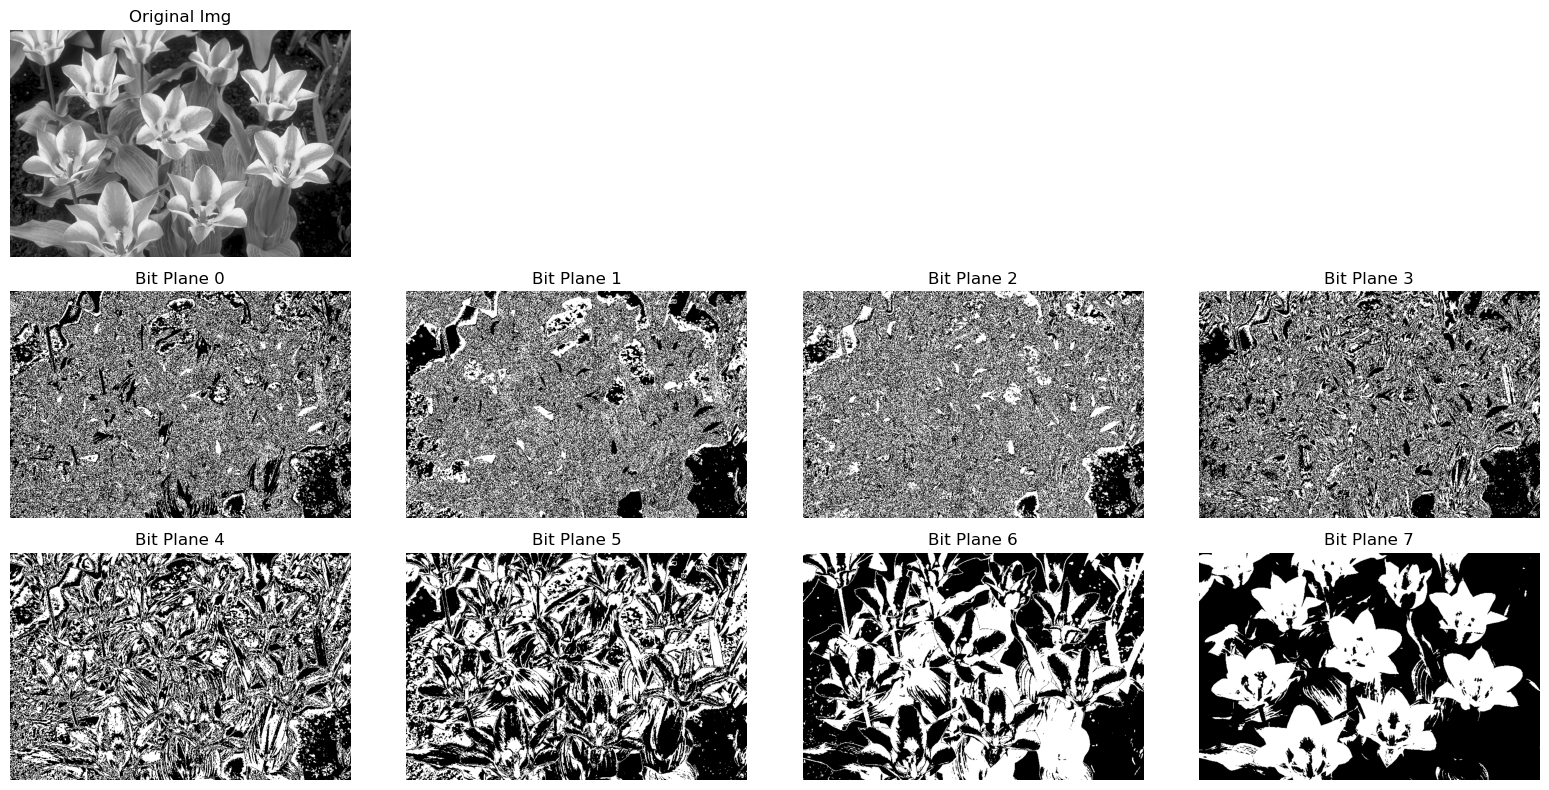

In [22]:
plt.figure(figsize=(16, 8))

plt.subplot(3, 4, 1)
plt.imshow(img_gray, cmap="gray")
plt.title("Original Img")
plt.axis('off')

for i in range(8):
    plt.subplot(3, 4, i + 5)
    plt.imshow(planes[i], cmap='gray') 
    plt.title(f'Bit Plane {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

---
## 4. Gray Level Slicing

In [26]:
# Without Background
min_range = 60
max_range = 90

slice_no_bg = np.zeros_like(img_gray)

h, w = img_gray.shape

for i in range(h):
    for j in range(w):
        if min_range <= img_gray[i, j] <= max_range:
            slice_no_bg[i, j] = 255
        else:
            slice_no_bg[i, j] = 0

In [35]:
# Without Background
min_range = 90
max_range = 120

slice_no_bg = np.zeros_like(img_gray)
h, w = img_gray.shape

for i in range(h):
    for j in range(w):
        if min_range <= img_gray[i, j] <= max_range:
            slice_no_bg[i, j] = 255
        else:
            slice_no_bg[i, j] = 0

In [36]:
# With Background
slice_with_bg = img_gray.copy()

mask = (img_gray >= min_range) & (img_gray <= max_range)
slice_with_bg[mask] = 255

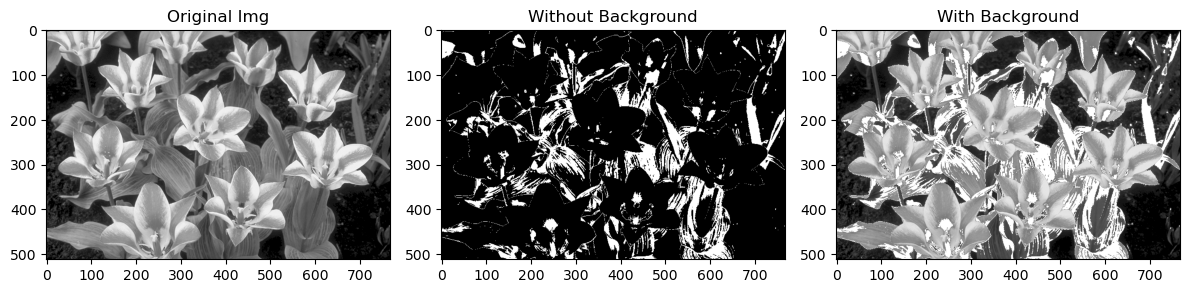

In [37]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap="gray")
plt.title("Original Img")

plt.subplot(1, 3, 2)
plt.imshow(slice_no_bg, cmap="gray")
plt.title("Without Background")

plt.subplot(1, 3, 3)
plt.imshow(slice_with_bg, cmap="gray")
plt.title("With Background")

plt.tight_layout()
plt.show()